Iteration 1: Price = 3033.5, Sentiment = N/A (First Data Point)
Iteration 2: Price = 3033.5, Sentiment = Neutral
Iteration 3: Price = 3033.5, Sentiment = Neutral
Iteration 4: Price = 3033.5, Sentiment = Neutral
Iteration 5: Price = 3033.5, Sentiment = Neutral
Iteration 6: Price = 3033.5, Sentiment = Neutral
Iteration 7: Price = 3034.05, Sentiment = Positive
Iteration 8: Price = 3034.05, Sentiment = Neutral
Iteration 9: Price = 3034.05, Sentiment = Neutral
Iteration 10: Price = 3034.05, Sentiment = Neutral
Iteration 11: Price = 3034.05, Sentiment = Neutral
Iteration 12: Price = 3034.05, Sentiment = Neutral
Iteration 13: Price = 3034.05, Sentiment = Neutral
Iteration 14: Price = 3034.05, Sentiment = Neutral
Iteration 15: Price = 3034.05, Sentiment = Neutral
Iteration 16: Price = 3034.2, Sentiment = Positive
Iteration 17: Price = 3034.2, Sentiment = Neutral
Iteration 18: Price = 3034.2, Sentiment = Neutral
Iteration 19: Price = 3034.2, Sentiment = Neutral
Iteration 20: Price = 3034.2, Sen

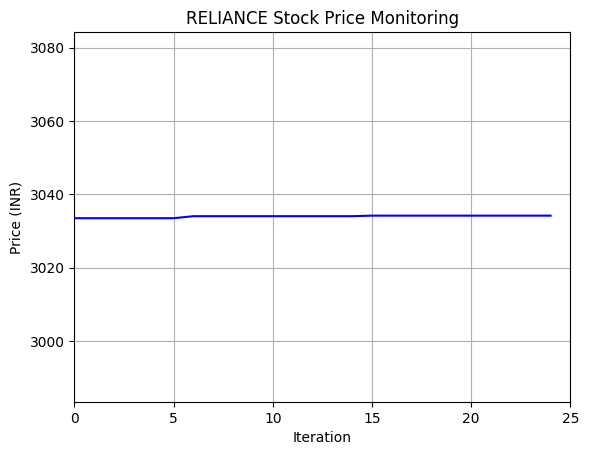

In [ ]:
import requests
from bs4 import BeautifulSoup
import time
import matplotlib.pyplot as plt
def get_sentiment(current_price, previous_price):
    if current_price > previous_price:
        return "Positive"
    elif current_price < previous_price:
        return "Negative"
    else:
        return "Neutral"

def scrape_price(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')
        price_text = soup.find('div', {'class': 'YMlKec fxKbKc'}).text
        price = float(price_text.strip()[1:].replace(",", ""))
        return price

    except Exception as e:
        print(f"Error scrapping price: {e}")
        return None

ticker = 'RELIANCE'
url = 'https://www.google.com/finance/quote/RELIANCE:NSE'
n = 25
sleep_time = 0.5
show_sentiment = True

plt.ion()
fig, ax = plt.subplots()
x, y = [], []
line, = ax.plot(x, y, color='b', label='Price Line')  # Line plot

ax.set_xlim(0, n)
previous_price = None

for i in range(n):
    price = scrape_price(url)

    if price is None:
        continue

    if previous_price is not None:
        sentiment = get_sentiment(price, previous_price)
        if show_sentiment:
            print(f"Iteration {i+1}: Price = {price}, Sentiment = {sentiment}")
    else:
        print(f"Iteration {i+1}: Price = {price}, Sentiment = N/A (First Data Point)")
    previous_price = price

    x.append(i)
    y.append(price)

    line.set_xdata(x)
    line.set_ydata(y)

    #ax.scatter(x, y, color='r')
    ax.set_ylim(min(y) - 50, max(y) + 50)

    fig.canvas.draw()
    fig.canvas.flush_events()

    time.sleep(sleep_time)

plt.xlabel('Iteration')
plt.ylabel('Price (INR)')
plt.title(f'{ticker} Stock Price Monitoring')
plt.grid(True)
plt.ioff()
plt.show()
